In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import norm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.style.use('dark_background')

In [2]:
# Temperatures used in the simulations

temp = np.genfromtxt("temp.txt")
print(temp)

[0.5  0.65 0.8  0.95 1.1  1.25 1.4  1.55 1.7  1.85 2.  ]


In [3]:
#for theoretical comparison of internal energy
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

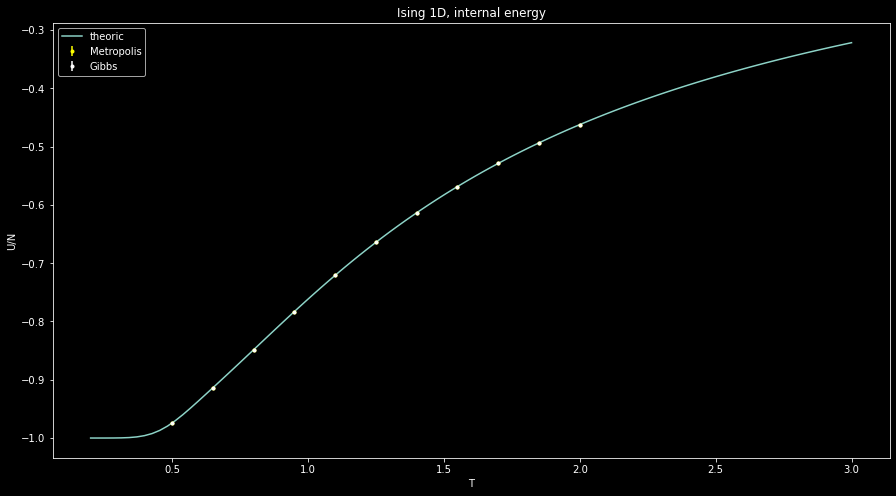

In [5]:
# Energy

# Metropolis
data = np.genfromtxt('metropolis/output.ene.csv', dtype=float, delimiter=',', usecols=(3,4))
ene = data[:,0]
ene_err = data[:,1]
plt.errorbar(temp, ene, yerr=ene_err, marker='.', linestyle='none', label='Metropolis', color='#FFFF00')

# Gibbs
data = np.genfromtxt('gibbs/output.ene.csv', dtype=float, delimiter=',', usecols=(3,4))
ene = data[:,0]
ene_err = data[:,1]
plt.errorbar(temp, ene, yerr=ene_err, marker='.', linestyle='none', label='Gibbs', color='white')
             
    
# Theoric
plt.plot(T, e, label='theoric')


plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.show()   

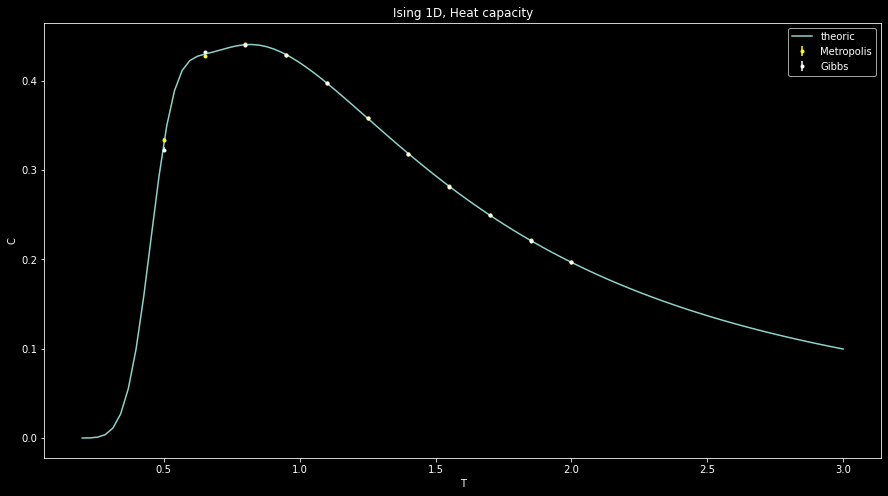

In [7]:
# Heat capacity

# Metropolis
data = np.genfromtxt('metropolis/output.heat.csv', dtype=float, delimiter=',', usecols=(3,4))
ene = data[:,0]
ene_err = data[:,1]
plt.errorbar(temp, ene, yerr=ene_err, marker='.', linestyle='none', label='Metropolis', color='#FFFF00')

# Gibbs
data = np.genfromtxt('gibbs/output.heat.csv', dtype=float, delimiter=',', usecols=(3,4))
ene = data[:,0]
ene_err = data[:,1]
plt.errorbar(temp, ene, yerr=ene_err, marker='.', linestyle='none', label='Gibbs', color='white')             
    
# Theoric
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label='theoric')


plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.legend()
plt.show()  

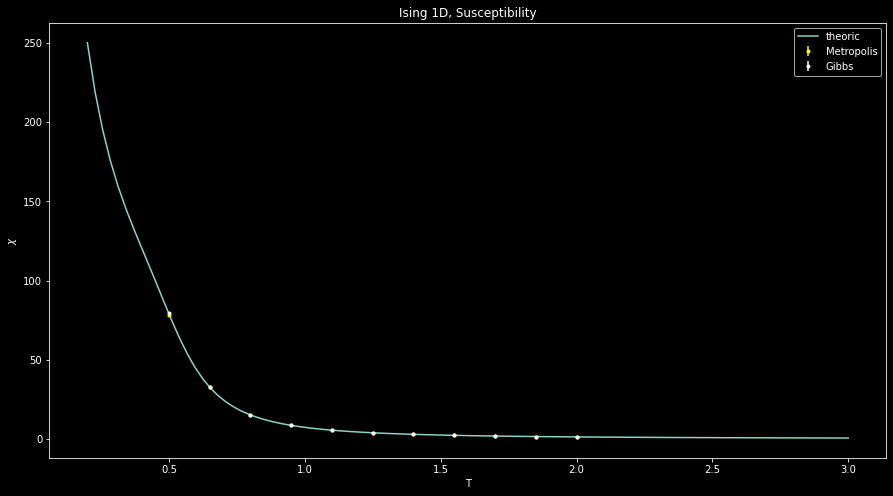

In [9]:
# Susceptibility

# Metropolis
data = np.genfromtxt('metropolis/output.chi.csv', dtype=float, delimiter=',', usecols=(3,4))
ene = data[:,0]
ene_err = data[:,1]
plt.errorbar(temp, ene, yerr=ene_err, marker='.', linestyle='none', label='Metropolis', color='#FFFF00')

# Gibbs
data = np.genfromtxt('gibbs/output.chi.csv', dtype=float, delimiter=',', usecols=(3,4))
ene = data[:,0]
ene_err = data[:,1]
plt.errorbar(temp, ene, yerr=ene_err, marker='.', linestyle='none', label='Gibbs', color='white')    
             
    
# Theoric
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label='theoric')

plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.show()  

In [10]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

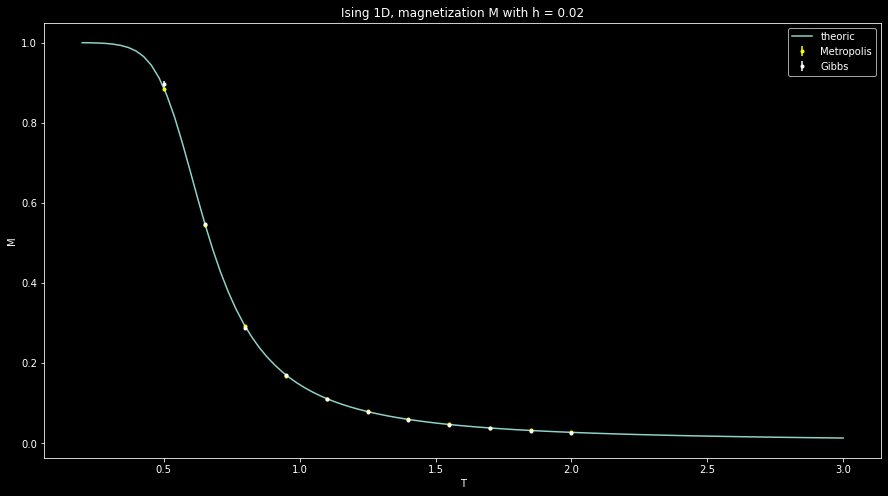

In [12]:
# Magnetization

# Metropolis
data = np.genfromtxt('metropolis/output.mag.csv', dtype=float, delimiter=',', usecols=(3,4))
ene = data[:,0]
ene_err = data[:,1]
plt.errorbar(temp, ene, yerr=ene_err, marker='.', linestyle='none', label='Metropolis', color='#FFFF00')

# Gibbs
data = np.genfromtxt('gibbs/output.mag.csv', dtype=float, delimiter=',', usecols=(3,4))
ene = data[:,0]
ene_err = data[:,1]
plt.errorbar(temp, ene, yerr=ene_err, marker='.', linestyle='none', label='Gibbs', color='white')             
    
# Theoric
plt.plot(T, M, label='theoric')


plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('M')
plt.legend()
plt.show() 

    The graphs show the thermodynamics of a 1D Ising model consisting of 50 spins.

    The graphs show the theoretical, expected and simulated values for each quantity, obtained with two different methods: the Metropolis algorithm and the Gibbs algorithm. The main difference between these two methods is that Metropolis proposes a flip of the current spin, and chooses whether to do it depending on the variation of the lattice energy. Conversely, the step proposed by Gibbs is independent of the current spin, so the decision made is whether the spin should be positioned high or low in order to minimize the lattice energy. Despite these differences, we see from the graphs that the two methods are equivalent, as they both return almost the same values for each quantity and temperature.

    Looking at the graphs, we can say that internal energy, magnetization and susceptibility are in excellent agreement with theoretical predictions.

    All these simulations were performed using block averages with 30 blocks containing 1000000 steps each. Each value comes from a balanced system, 1000 equilibration steps have been used for each simulation. The plotted values were calculated after a total of 30 million steps, which is a very large number and explains the excellent agreement of the results with the expected values. Please note that step means an attempt to overturn each of the 50 spins that make up the system, not just a single one.